<a href="https://colab.research.google.com/github/AqoU-dayo/22_2_DataScience/blob/main/ds_hw2_201910529_Kwonwoojin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science HW2:  Linear Regression and Stochastic Gradient Descent
# (양식파일 업데이트 버전)
이번 과제는 Stochastic Gradient Descent로 train 하는 Linear Regressor를 Sklearn API를 extension 하여 직접 구현합니다. 직접 구현한 코드를 sklearn의 linear 

*   Base Class가 되는 BaseEstimator는 sklearn web site를 참고할 것. 
https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html 
* "your code" 라고 쓰여져 있는 code section에 code 와 간단한 comments 를 추가할 것
* Dataset은 eCampus 과제에 첨부되어진 weights_heights.csv 사용 
* 아래 섹션에 학번과 이름을 기입할 것

# Submission Guideline 
* 실행된 결과가 있는 Code를 ds_hw2_학번_영어로이름.ipynb 로 해서 eCampus에 제출합니다. (한글 이름은 깨짐으로 사용하지 말것.) 
* Deadline: 11월 6일 일요일 23:59분 

# Late Policy: 
* Late Submission: Your score will be discounted 10% per day, upto 3 days. 
* Your submission later than 11월 9일 수요일 23:59분 will NOT BE ACCEPTED.

## 학번: 201910529
## 이름: 권우진

## <center>Linear regression and Stochastic Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

**Implement class `SGDRegressor`. Specification:**
- class is inherited from `sklearn.base.BaseEstimator`
- constructor takes parameters `eta` – gradient step ($10^{-3}$ by default) and `n_epochs` – dataset pass count (3 by default)
- constructor also creates `mse_` and `weights_` lists in order to track mean squared error and weight vector during gradient descent iterations
- Class has `fit` and `predict` methods
- The `fit` method takes matrix `X` and vector `y` (`numpy.array` objects) as parameters, appends column of ones to  `X` on the left side, initializes weight vector `w` with **zeros** and then makes `n_epochs` iterations of weight updates, and for every iteration logs mean squared error and weight vector `w` in corresponding lists we created in the constructor. 
- Additionally the `fit` method will create `w_` variable to store weights which produce minimal mean squared error
- The `fit` method returns current instance of the `SGDRegressor` class, i.e. `self`
- The `predict` method takes `X` matrix, adds column of ones to the left side and returns prediction vector, using weight vector `w_`, created by the `fit` method.

In [ ]:
# SGD Regressor (경사하강법)을 구현하는 클래스를 우선적으로 제작합니다
class SGDRegressor(BaseEstimator):
    # you code here
    # 함수의 첫번재 인자인 self에 대한 값은 파이썬에서 자동으로 넘겨주기 때문에 각 함수의 첫번째 인자마다 self를 추가했습니다.
      def __init__(self, eta=1e-3, n_epochs=3):
        self.eta = eta
        self.n_epochs = n_epochs
        self.mse_ = []
        self.weights_ = []
        
      def fit(self, X, y):
        # hstack(배열을 옆으로 결합하는 함수)를 통해 X에서 왼쪽으로 1열을 더해주었습니다
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        
        # W의 값을 넘파이를 이용하여 0으로 초기화시켜주었습니다, (d + 1)-dimensional (2-dimensional)
        w = np.zeros(X.shape[1])
        
        for it in tqdm(range(self.n_epochs)):
            for i in range(X.shape[0]):
                                 
                # new_w 는 w가 동시적으로 업데이트 될때 사용됩니다
                new_w = w.copy()
                new_w[0] += self.eta * (y[i] - w.dot(X[i, :]))
                
                for j in range(1, X.shape[1]):
                    new_w[j] += self.eta * (y[i] - w.dot(X[i, :])) * X[i, j]  
                w = new_w.copy()
                
                # 현재 weight 벡터를 저장합니다
                self.weights_.append(w)
                # 현재 loss함수를 저장합니다
                self.mse_.append(mean_squared_error(y, X.dot(w)))
        self.w_ = self.weights_[np.argmin(self.mse_)]
                
        return self
                  
      def predict(self, X):
        # hstack(배열을 옆으로 결합하는 함수)를 통해 X에서 왼쪽으로 1열을 더해주었습니다
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        # linear prediction
        return X.dot(self.w_)              

**Use the dataset in the eCampus.**
Let's test out the algorithm on height/weight data. We will predict heights (in inches) based on weights (in lbs).

In [ ]:
# 과제에 주어진 CSV파일을 불러옵니다
data_demo = pd.read_csv('weights_heights.csv')

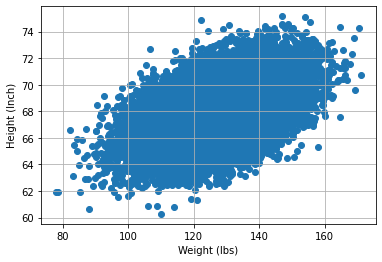

In [52]:
# scatter을 이용하여 csv파일의 데이터를 점도표로 나타냅니다
plt.scatter(data_demo['Weight'], data_demo['Height'])
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (Inch)')
plt.grid();

In [ ]:
# X ; Weight, Y : Height
X, y = data_demo['Weight'].values, data_demo['Height'].values

**Perform train/test split and scale data.**

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state=17)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([-1, 1]))

Train created `SGDRegressor` with `(X_train_scaled, y_train)` data. 
**Feel free to change the hyperparameters of eta (learning rate) and n_epochs.** 

In [ ]:
# you code here
# 위의 클래스에서 구현한 SGDRegressor을 사용합니다
sgd_reg = SGDRegressor()
# sgd_reg의 fit에 X_train_scaled와 y_train을 각각의 인자로 넣었습니다
# 그리고 fit를 이용해 선형 모델을 피팅을 시도했습니다
sgd_reg.fit(X_train_scaled, y_train)

100%|██████████| 3/3 [00:32<00:00, 10.68s/it]


SGDRegressor()

** Draw a chart with training process **  – dependency of mean squared error from the i-th SGD iteration number. (y-axis: MSE, x-axis: training iteration)  
* Example: trainig_process_chart_ref.png in eCampus
### WARNING
* Don't worry if your graph does not look exactly like this. This is just for your reference to understand what information you should plot. 
* DON'T FORGET TITLE, x-axis, y-axis and/or necessary information on your graph!  
<img src="trainig_process_chart_ref.png" alt="training" style="width:400px;"/>


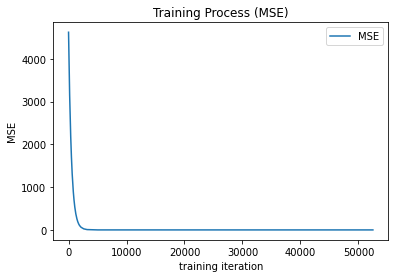

In [56]:
# you code here

# mse데이터의 크기의 범위에서의 MSE 데이터를 보기 위한 그래프를 matplotlib를 이용해 그려보았다
plt.plot(range(len(sgd_reg.mse_)), sgd_reg.mse_)

# X는 과정, y는 MSE값 그리고 선에 대해서는 MSE라고 지칭하였다
plt.title("Training Process (MSE)")
plt.xlabel('training iteration')
plt.ylabel('MSE')
#legend에 세미클론을 붙여 컴포넌트 객체를 반환하는 것을 숨겼다
plt.legend(labels=['MSE'], loc='best');

Print the minimal value of mean squared error and the best weights vector.

In [ ]:
# you code here
np.min(sgd_reg.mse_), sgd_reg.w_

(2.7151352406643623, array([67.9898497 ,  0.94447605]))

**Draw chart of model weights ($w_0$ and $w_1$) behavior during training.**
* Example: weight_chart.png in the eCampus 
#### WARNING: 
* Don't worry if your graph does not look exactly like this. This is just for your reference to understand what information you should plot. 
* DON'T FORGET to mention TITLE, x-axis, y-axis and/or necessary information on your graph!  
<img src="weight_chart_ref.png" alt="training" style="width:400px;"/>



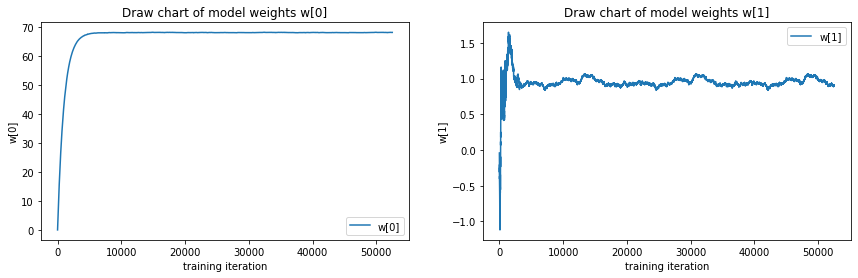

In [59]:
# you code here
# X 데이터는 weight데이터 크기(데이터 분석량)에 대한 w[0],일때와 w[1]때의 차이를 좌우비교할 수있게 그래프를 작성했다

# 1행 2열의 칸중 1열에 그래프 생성
plt.subplot(121)
plt.title("Draw chart of model weights w[0]")
plt.xlabel('training iteration')
plt.ylabel('w[0]')
plt.plot(range(len(sgd_reg.weights_)), [w[0] for w in sgd_reg.weights_]);  #세미클론을 붙여 컴포넌트 객체를 반환하는 것을 숨겼다
plt.legend(labels=['w[0]'], loc='best'); #legend에 세미클론을 붙여 컴포넌트 객체를 반환하는 것을 숨겼다
#subplot간 간격이 좁아 글씨가 접혀 adjust를 이용해 right에 패딩을 해주었습니다
plt.subplots_adjust(right=2)

#1행 2열의 칸중 2열에 그래프 생성
plt.subplot(122)
plt.title("Draw chart of model weights w[1]")
plt.xlabel('training iteration')
plt.ylabel('w[1]')
plt.plot(range(len(sgd_reg.weights_)), [w[1] for w in sgd_reg.weights_]);
plt.legend(labels=['w[1]'], loc='best'); #legend에 세미클론을 붙여 컴포넌트 객체를 반환하는 것을 숨겼다

**Make a prediction** for hold-out set `(X_valid_scaled, y_valid)` and check MSE value.

In [ ]:
# you code here. you need to replace 10 with MSE.  
sgd_holdout_mse = 10 

# MSE값 초기화 : MSE(평균제곱오차)값을 구하기 위해 라이브러리의 mean_squared_error 함수를 이용했다
sgd_holdout_mse = mean_squared_error(y_valid, sgd_reg.predict(X_valid_scaled))

# 각각 실제값과 예측값을 인자값로 넣었고 이 후 sgd_holdout_mse 가 제대로 나오는지 확인해보았다
sgd_holdout_mse

2.6708681207033784

**Do the same thing** for `LinearRegression` class from `sklearn.linear_model`. Evaluate MSE for hold-out set.

In [ ]:
# you code here
# you need to replace 9 with MSE.  
linreg_holdout_mse = 9

# 선형 회귀를 사용하기 위해 라이브러리를 import
from sklearn.linear_model import LinearRegression

#linearmodel이라는 변수에 선형회귀를 한 데이터를 담아두었다 
linearmodel = LinearRegression().fit(X_train_scaled, y_train)

#그리고 선형회귀를 통해 나온 데이터 확인을 위해 coef(회귀계수), 절편을 출력했다.
print(linearmodel.coef_, linearmodel.intercept_)

# linreg_holdout_mse를 초기화 : 위와 동일하게 MSE(평균제곱오차)값을 구하기 위해 라이브러리의 mean_squared_error 함수를 이용했다
linreg_holdout_mse = mean_squared_error(y_valid, linearmodel.predict(X_valid_scaled))

# LinearRegression을 통해 도출된 mse값을 출력했다.
linreg_holdout_mse

[0.94537278] 67.98930834742858


2.670830767667635

If you successfully implement, you will pass the following test. 

In [ ]:
try:
    assert (sgd_holdout_mse - linreg_holdout_mse) < 1e-4
    print('Correct!')
except AssertionError:
    print("Something's not good.\n Linreg's holdout MSE: {}"
          "\n SGD's holdout MSE: {}".format(linreg_holdout_mse, 
                                            sgd_holdout_mse))

Correct!
